# Portfolio Theory - Homework #1
Due October 11, 2018 

Robert Hatem, Tania Labastida, Sergio Calvo de Leon

## 1. HMC's Approach

### 1. The HMC framing of the portfolio allocation problem.

#### (a) Why does HMC focus on real returns when analyzing its portfolio allocation? Is this just a matter of scaling, or does using real returns versus nominal returns potentially change the MV solution?

HMC focuses on real returns when analyzing its portfolio allocation because that’s what overseers at the university care about.  Real returns are a better measure because returns that are eroded by inflation are bad.  Accounting for inflation gets the university more purchasing power, instead of simply more raw dollars.  Using the nominal would not change the Mean-Variance (MV) solution in the optimal allocation if each asset were multiplied by the same factor.  It’s easy to show that the constant would simply cancel out in the equation for the optimal portfolio, resulting in the same allocation as before.

However, if converting nominal to real rates requires more than one simply multication of a constant, then the MV solutions (weights) will indeed be different. For example, if every year of the time series requires multiplying by a different constant, then those constants can't some out of the summation and the MV solution will indeed change.

#### (b) There are thousands of individual risky assets in which HMC can invest. Explain why MV optimization across 1,000 securities is infeasible.

The mean variance optimization method takes into account the mean and variance vectors of a distribution of returns. These parameters are not directly observable but estimated based on fundamental and historical information. Therefore, the weight values are estimates of the optimal portfolio weights. The estimation error inherent in the parameters in transmitted to the portfolio weights. When the number of assets increases, the dimension of the covariance matrix increases at a quadratic rate propagating the estimation errors at this higher rate.

https://www.empiwifo.uni-freiburg.de/lehre-teaching-1/winter-term-10-11/materialien-portfolio-analysis/empirics.pdf

#### (c) Rather than optimize across all securities directly, HMC runs a two-stage optimization.
First, they build asset class portfolios with each one optimized over the securities of the
specific asset class. Second, HMC combines the asset-class portfolios into one total optimized portfolio.

In order for the two-stage optimization to be a good approximation of the direct MV-
optimization, what must be true of the partition of securities into asset classes?

The asset-specific sub-portfolios should be linearly independent. To detect, this you need to run the first stage, then form the returns matrix of the asset-specific sub-portfolios and see if its singular (determinant is zero). If it is, then go back and redo stage one using a different method, or just discard the unnecessary sub-portfolio and procede with stage two.  

#### (d) Should TIPS form a new asset class or be grouped into one of the other 11 classes?

Since there is a two-stage process, there is a risk that TIPS is a linear combination of the other 11 assets. There is no way to know for sure by theory; You need to run the first stage, then see if the TIPS sub-portfolio is a linear combination of the other 11 sub-portfolios.If so, then it can be safely merged with another asset class before stage-one without losing any performance.

### 2. Portfolio Constraints
The case discusses the fact that Harvard places bounds on the portfolio allocation rather than
implementing whatever numbers come out of the MV optimization problem.

#### (a) Similar to what we did in the lecture, write down the mathematical optimization problem which corresponds to the bounded solutions given in Exhibits 5 and 6. Do not try to solve it.  In the lecture, we solved these optimization problems to get explicit formulas. Explain why we cannot similarly get closed-form solutions for these bounded optimizations.

<img src="equations_2a.png">

According to the problem definition, we are seeking to find a convex function in the weights vector. By limiting the range of the weights, the function will not be purely convex, as it will have a range of possible solutions (no one unique extremum).

#### (b) Exhibits 5 shows zero allocation to domestic equities and domestic bonds across the entire computed range of targeted returns, (5.75% to 7.25%). Conceptually, why is the constraint binding in all these cases? What would the unconstrained portfolio want to do with those allocations and why?

The constraint prevents shorts positions in these asset classes. Since the allocations are zero, removing the constraint would probably result in short positions (negative values) in these asset classes, which were prevented by the constraint before.

#### (c) Exhibit 6 changes the constraints, (tightening them in most cases.) How much deterioration do we see in the mean-variance tradeoff? Do you think this deterioration is worse at a targeted return of 10% or at 5% . Why?

The sharpe ratio drops from 0.38 to 0.35 or 0.36 for all expected real return (5.75% to 7.25%).  There is no reason to think this trend would not continue for 5% or 10%.  So the deterioration would be roughly the same at 5%, 10%, or any other expected return value.

It’s interesting to note that as the expected return increases, the allocation to TIPS drops.  This is because TIPS is a low-return asset, so you want less of it to achieve higher returns. The opposite direction is true for Emerging Markets; the allocation to EM increases as you increase target expected real return. 

## 2. Mean-Variance Optimization
* The exhibit data is in a spreadsheet posted on Canvas,1 but you do not need to use it; I provide it only in case you wish to do extra comparisons to the case data.
* For our analysis, we use more current data found in assetclass data monthly.xlsx.
* The time-series data gives monthly returns for the 12 asset classes from Jan 2000 to Sep 2018.
* There are missing values, as some of the assets do not have return data until 2003, 2007, or even 2009. You can still work with this; just be sure that your computations ignore missing values when calculating the mean returns and that they calculate pairwise covariances2 using only the rows for which both assets have a listed return.3
* Notice that there is no risk-free rate in the case. Cash has small but positive covariances, and is thus a risky asset. Thus we will be working with the risky MV frontier for 12 asset classes.
* These are nominal returns|they are not adjusted for ination, and we only worry about optimizing nominal returns.

### 1. Summary statistics

#### (a) Calculate and display the mean and volatility of each asset. (Recall we use volatility to refer to standard deviation.)

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

file_path = '/Users/roberthatem/Documents/Chicago FinM/Portfolio Thoery (Hendricks)/Homework 1/assetclass_data_monthly.xlsx'

returns = pd.read_excel(file_path,
                 parse_dates=["Dates"],
                 #date_parser=lambda m: pd.to_datetime(m, format = "%Y-%m"),
                 index_col="Dates")

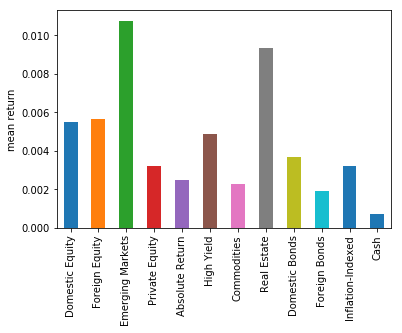

In [36]:
# display mean return by asset
returns.mean().plot.bar();
plt.ylabel('mean return');

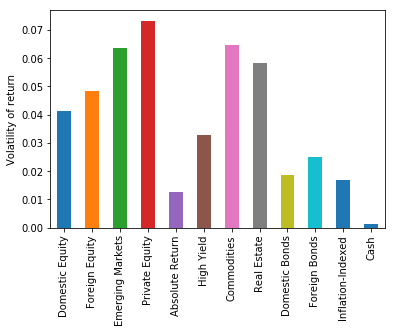

In [37]:
# display volatility by asset
returns.std().plot.bar();
plt.ylabel('Volatility of return');

#### (b) Which assets have the best and worst mean-volatility ratios?

Since these are not excess returns, this ratio is not technically the Sharpe Ratio.

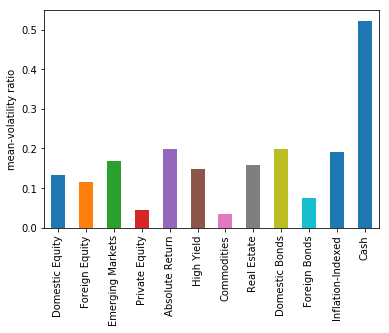

In [38]:
# mean-volatility ratio
(returns.mean()/returns.std()).plot.bar();
plt.ylabel('mean-volatility ratio');

Commodities has the worst (lowest) mean-volatility ratio and cash has the highest mean-volatility ratio, due to its very low volatility (its mean is also smallest, but the volatility is so low that it creates the largest ratio).

#### (c) Considering our discussion of correlation constraints, are there any assets for which $\rho^{1,2}$ and $\rho^{1,3}$ have opposite signs, yet $\rho^{2,3}$ is positive?

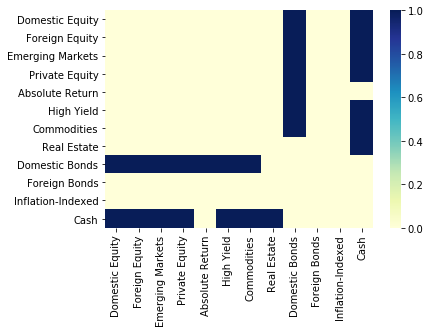

In [103]:
# yellow is positive correlation
import seaborn as sns
sns.heatmap(returns.corr()<0, cmap="YlGnBu");

Domestic Equity has **negative** correlation with Domestic Bonds (-.29), and **positive** correlation with Foreign Bonds (.39). However, Domestic Bonds has **positive** correlation with Foreign Bonds (.38).

### 2. The MV frontier

In [39]:
from datetime import datetime

# function to calculate everything
def mv_portfolio(train_data, test_data, mu_p):
    '''
    Trains model on data, subject to target mean mu_p, and gives in-sample statistics
    '''
    master_dist = {}
    
    # calculate mean return mu
    mu = np.array([train_data.mean().values.T]).T
    master_dist['mu'] = mu

    # reshape
    p = len(mu)
    master_dist['p'] = p

    # calculate covariance matrix Sigma
    Sigma = train_data.cov().values
    master_dist['Sigma'] = Sigma

    # calculate weights of tangency portfolio, omega_t
    Sigma_inv = np.linalg.inv(Sigma)
    ones_vec = np.ones((p,1))
    denominator_t = ones_vec.T @ Sigma_inv @ mu

    omega_t = (denominator_t**-1) * Sigma_inv @ mu
    master_dist['omega_t'] = omega_t

    # calculate weights of global minimum variance portfolio
    denominator_v = ones_vec.T @ Sigma_inv @ ones_vec
    
    omega_v = (denominator_v**-1) * Sigma_inv @ ones_vec
    master_dist['omega_v'] = omega_v

    # mean for tangency portfolio
    mu_t = omega_t.T @ mu
    master_dist['mu_t'] = mu_t

    # standard deviation for GMV portfolio
    mu_v = omega_v.T @ mu
    master_dist['mu_v'] = mu_v

    # volatility for tangency portfolio
    sd_t = (omega_t.T @ Sigma @ omega_t)**0.5
    master_dist['sd_t'] = sd_t # (np.dot(omega_t.T,Sigma).dot(omega_t))**0.5

    # standard deviation for GMV portfolio
    sd_v = (omega_v.T @ Sigma @ omega_v)**0.5
    master_dist['sd_v'] = sd_v

    # weight of MV portfolios
    delta = (mu_p - mu_v)/(mu_t - mu_v)
    master_dist['delta'] = delta

    # weights of optimal portfolio
    omega_p = delta*omega_t + (1-delta)*omega_v
    master_dist['omega_p'] = omega_p
    
    # mean return of overall portfolio
    mu_p = omega_p.T @ mu
    master_dist['mu_p'] = mu_p

    # volatility of overall portfolio
    sd_p = (omega_p.T @ Sigma @ omega_p)**(1/2)#      (np.dot(omega_p.T,Sigma).dot(omega_p))**0.5
    master_dist['sd_p'] = sd_p

    # mean-volatility ratio
    mean_vol_ratio_p = mu_p/sd_p
    master_dist['mean_vol_ratio_p'] = mean_vol_ratio_p
    
    # mean return of test set
    mu_test_set = np.array([test_data.mean().values.T]).T
    master_dist['mu_test_set'] = mu_test_set

    # mean return on test set
    mu_return_test_set = omega_p.T @ mu_test_set
    master_dist['mu_return_test_set'] = mu_return_test_set
    
    # volatility of test set
    Sigma_test_set = test_data.cov().values
    master_dist['Sigma_test_set'] = Sigma_test_set

    # volatility of model trained on train_data applied to test_data
    sigma_vol_test_set = omega_p.T @ Sigma_test_set @ omega_p
    master_dist['sigma_vol_test_set'] = sigma_vol_test_set

    # mean_variance ratio of model on out-of-sample data
    m_v_ratio_test_set = mu_return_test_set/sigma_vol_test_set
    master_dist['m_v_ratio_test_set'] = m_v_ratio_test_set
    
    return master_dist

#### (a) Compute and display the weights of both the tangency and global-minimum-variance portfolios: $\omega^{t}$ and $\omega^{v}$.

$\omega^t = \Bigg(\frac{1}{\textbf{1}^{'}\sum^{-1}\mu} \Bigg) \sum^{-1}\mu$

$\omega^t = \Bigg(\frac{1}{\textbf{1}^{'}\sum^{-1}\textbf{1}} \Bigg) \sum^{-1}\textbf{1}$

In [40]:
# target mean return
mu_p = 0.0067

# run optimization for whole portfolio
portfolio_2 = mv_portfolio(returns, returns, mu_p)

# asset classes
cols = list(returns.keys())

# store in dataframe for easy-to-read printing
d = pd.DataFrame(index=cols)
d['omega_t'] = portfolio_2['omega_t'].reshape(12)
d['omega_v'] = portfolio_2['omega_v'].reshape(12)

print(d)

                    omega_t   omega_v
Domestic Equity   -0.001159  0.000533
Foreign Equity    -0.015762  0.000508
Emerging Markets   0.013125 -0.001911
Private Equity     0.013544  0.005408
Absolute Return    0.054327  0.010332
High Yield         0.027043  0.005298
Commodities       -0.006653 -0.002334
Real Estate       -0.013104 -0.001474
Domestic Bonds     0.048451 -0.004629
Foreign Bonds     -0.039650 -0.011592
Inflation-Indexed -0.006645  0.002879
Cash               0.926482  0.996983


#### (b) Compute the mean and standard deviation of the returns for $\omega^{t}$ and $\omega^{v}$.

In [41]:
# Annualized mean return for omega_t and omega_v
print('Annualized mean return for omega_t:', 12* portfolio_2['mu_t'][0][0])
print('Annualized mean return for omega_v:', 12 * portfolio_2['mu_v'][0][0], '\n')

# Annualized standard deviation for omega_v
print('Annualized standard deviation for omega_t:', 12 * portfolio_2['sd_t'][0][0])
print('Annualized standard deviation for omega_v:', 12 * portfolio_2['sd_v'][0][0])

Annualized mean return for omega_t: 0.011741046599526002
Annualized mean return for omega_v: 0.008802503398146254 

Annualized standard deviation for omega_t: 0.018336796736293935
Annualized standard deviation for omega_v: 0.015877172588094624


### 3. The allocation

#### (a) Compute and display the weights of MV portfolios with target returns of $\mu^p = .0067$

In [42]:
# weights of MV portfolios with target returns of 0.0067
d['omega_p'] = portfolio_2['omega_p']

print('Weight of the tangency vs. GMV portfolios is:', portfolio_2['delta'][0][0], 'vs.', 1-portfolio_2['delta'][0][0], '\n')
print(d)

Weight of the tangency vs. GMV portfolios is: 24.364963077022736 vs. -23.364963077022736 

                    omega_t   omega_v   omega_p
Domestic Equity   -0.001159  0.000533 -0.040674
Foreign Equity    -0.015762  0.000508 -0.395911
Emerging Markets   0.013125 -0.001911  0.364448
Private Equity     0.013544  0.005408  0.203644
Absolute Return    0.054327  0.010332  1.082288
High Yield         0.027043  0.005298  0.535106
Commodities       -0.006653 -0.002334 -0.107568
Real Estate       -0.013104 -0.001474 -0.284858
Domestic Bonds     0.048451 -0.004629  1.288683
Foreign Bonds     -0.039650 -0.011592 -0.695229
Inflation-Indexed -0.006645  0.002879 -0.229164
Cash               0.926482  0.996983 -0.720767


$\delta$ is positive, indicating that we buy multiple of the tangency portfolio and short the GMV portfolio.

#### (b) What is the mean, volatility, and mean-volatility ratio for $\omega^p$?

RH: We were just given the mean, so we will output it here.

In [43]:
# mean, vol, mean-vol ratio

print('Mean of omega_p:', portfolio_2['mu_p'][0][0])
print('Vol of omega_p:', portfolio_2['sd_p'][0][0])
print('Mean-vol ratio of omega_p:', portfolio_2['mean_vol_ratio_p'][0][0])

Mean of omega_p: 0.006700000000000008
Vol of omega_p: 0.018672977528197455
Mean-vol ratio of omega_p: 0.3588072651982019


#### (c) Discuss the allocation. In which assets is the portfolio most long? And short?

In [44]:
# show weights of omega_p
print(d['omega_p'])

Domestic Equity     -0.040674
Foreign Equity      -0.395911
Emerging Markets     0.364448
Private Equity       0.203644
Absolute Return      1.082288
High Yield           0.535106
Commodities         -0.107568
Real Estate         -0.284858
Domestic Bonds       1.288683
Foreign Bonds       -0.695229
Inflation-Indexed   -0.229164
Cash                -0.720767
Name: omega_p, dtype: float64


The portfolio is most long on Domestic bonds with weight 1.28. The largest short position is cash at -0.72. The positions are not far out - they are all near 0 and most are within 1.

#### (d) Does this line up with which assets have the strongest mean-volatility ratios?

First, let's add the column for mean-volatility ratio so we can compare to their weights.

In [45]:
# add column for mean-volatility ratio
sd_by_asset = (np.diagonal(portfolio_2['Sigma']))**0.5

p=12

mean_vol_ratio_by_asset = portfolio_2['mu']/(sd_by_asset.reshape((p,1)))

d['M_V_Ratio'] = mean_vol_ratio_by_asset.reshape((p))

# columns for mean return and volatility
d['mu'] = portfolio_2['mu']
d['vol'] = sd_by_asset.reshape((p))

print(d)

                    omega_t   omega_v   omega_p  M_V_Ratio        mu       vol
Domestic Equity   -0.001159  0.000533 -0.040674   0.133454  0.005504  0.041241
Foreign Equity    -0.015762  0.000508 -0.395911   0.116127  0.005626  0.048447
Emerging Markets   0.013125 -0.001911  0.364448   0.169355  0.010750  0.063477
Private Equity     0.013544  0.005408  0.203644   0.043479  0.003188  0.073313
Absolute Return    0.054327  0.010332  1.082288   0.198762  0.002493  0.012544
High Yield         0.027043  0.005298  0.535106   0.147401  0.004850  0.032905
Commodities       -0.006653 -0.002334 -0.107568   0.035205  0.002272  0.064538
Real Estate       -0.013104 -0.001474 -0.284858   0.159248  0.009311  0.058472
Domestic Bonds     0.048451 -0.004629  1.288683   0.199075  0.003690  0.018533
Foreign Bonds     -0.039650 -0.011592 -0.695229   0.075234  0.001888  0.025093
Inflation-Indexed -0.006645  0.002879 -0.229164   0.190098  0.003177  0.016714
Cash               0.926482  0.996983 -0.720767   0.

Domestic bonds are weighted most heavily, and they have a good mean-volatility ratio (0.199), but not the best.  There are many other assset classes with similar or better ratios.  Additionally, cash has the best ratio by far (0.523 vs. 0.199), and is also in a large short position, as expected.

#### (e) Is the weight on inflation-indexed bonds primarily motivated by adding mean returns or hedging?

TIPS's mean return is lower than that of the overall portfolio (0.0032 vs. 0.0067), so adding TIPS would not help achieve the desired mean return. Therefore, it is more useful for hedging.

### 4. The allocation without inflation-indexed bonds

#### (a) Drop the inflation-indexed bonds from your return array, and recompute $\omega^p$ as an 11 x 1 vector allocating to the remaining assets.

In [73]:
# remove 'Inflation-indexed'
train_data = returns.drop('Inflation-Indexed', 1)

# calculate portfolio
portfolio_4 = mv_portfolio(train_data, train_data, mu_p)

# results
cols = list(returns.keys())
cols.remove('Inflation-Indexed')
d4 = pd.DataFrame(index=cols)
d4['omega_p'] = portfolio_4['omega_p']
print(d4)

                   omega_p
Domestic Equity  -0.063525
Foreign Equity   -0.394951
Emerging Markets  0.361385
Private Equity    0.221500
Absolute Return   1.149219
High Yield        0.532721
Commodities      -0.123909
Real Estate      -0.307808
Domestic Bonds    1.184264
Foreign Bonds    -0.735457
Cash             -0.823437


#### (b) How does the portfolio compare to the allocation above where inflation-indexed bonds were available?

In [76]:
# Both for comparison
print('Omega_p with TIPS:\n',d['omega_p'])
print('Omega_p withouth TIPS:\n',d4['omega_p'], '\n')

Omega_p with TIPS:
 Domestic Equity     -0.040674
Foreign Equity      -0.395911
Emerging Markets     0.364448
Private Equity       0.203644
Absolute Return      1.082288
High Yield           0.535106
Commodities         -0.107568
Real Estate         -0.284858
Domestic Bonds       1.288683
Foreign Bonds       -0.695229
Inflation-Indexed   -0.229164
Cash                -0.720767
Name: omega_p, dtype: float64
Omega_p withouth TIPS:
 Domestic Equity    -0.063525
Foreign Equity     -0.394951
Emerging Markets    0.361385
Private Equity      0.221500
Absolute Return     1.149219
High Yield          0.532721
Commodities        -0.123909
Real Estate        -0.307808
Domestic Bonds      1.184264
Foreign Bonds      -0.735457
Cash               -0.823437
Name: omega_p, dtype: float64 



The cash allocation increased to a further short position. Absolute return increased from 1.08 to 1.14, while domestic bonds dropped from 1.28 to 1.18.

####  (c) Calculate the mean-volatility ratio. How much did it change?

In [64]:
# mean-volatility ratio
print('Ratio with TIPS:', portfolio_2['mean_vol_ratio_p'][0][0])
print('Ratio without TIPS:', portfolio_4['mean_vol_ratio_p'][0][0])

Ratio with TIPS: 0.3588072651982019
Ratio without TIPS: 0.35611027644080345


The mean-volatility ratio dropped slightly after removing TIPS. This makes sense; the performance should drop after adding a constraint i.e. setting weight of TIPS to zero.

#### (d) Do you think inflation-indexed bonds are a significant expansion of the investment opportunity set for an allocator that is optimizing nominal returns, as we are here? Or was it only relevant to HMC given their focus on inflation-adjusted returns?

The data suggests that TIPS are not a significant opportunity, since the mean-vol improved only a little bit. However, they would be more useful for inflation-injusted returns since they are tied to inflation and will can help protect against inflation. Additionally, it should be noted that for nominal returns, it is useful to try adding TIPS and seeing if it helps, instead of discarding TIPS right away based on nomial returns reasons. In short, whatever your theory, try it out if you have the time.

### 5. Return to considering the full set of 12 assets, including inflation-indexed bonds.

#### (a) Recalculate the allocation for $\mu^p = 0.01$,  (an annualized 12%.)

In [49]:
# target mean return
mu_p = 0.01

# run portfolio with all 12 assets
portfolio_5 = mv_portfolio(returns, returns, mu_p)

# dataframe to show results
cols = list(returns.keys())
d5 = pd.DataFrame(index=cols)
d5['omega_p'] = portfolio_5['omega_p']

print(d5)

                    omega_p
Domestic Equity   -0.063464
Foreign Equity    -0.615167
Emerging Markets   0.567079
Private Equity     0.313287
Absolute Return    1.675179
High Yield         0.828138
Commodities       -0.165771
Real Estate       -0.441595
Domestic Bonds     2.004004
Foreign Bonds     -1.073344
Inflation-Indexed -0.357505
Cash              -1.670840


#### (b) For which assets is the allocation most long and most short?

The portfolio is most long in Domestic Bonds with weight 2.00. The most short position is Cash at -1.67.

#### (c) How does the allocation compare to that for $\mu^p$ = .0067? For which assets has the allocation changed the most?

In [71]:
# allocation change
print('Change in allocation from 0.067 to 0.01:\n' ,d5['omega_p'] - d4['omega_p'])

Change in allocation from 0.067 to 0.01:
 Absolute Return      0.525960
Cash                -0.847403
Commodities         -0.041863
Domestic Bonds       0.819740
Domestic Equity      0.000061
Emerging Markets     0.205694
Foreign Bonds       -0.337887
Foreign Equity      -0.220216
High Yield           0.295417
Inflation-Indexed         NaN
Private Equity       0.091787
Real Estate         -0.133787
Name: omega_p, dtype: float64


The cash position dropped the most; from 0.82 to -1.67 (-0.85), while Domestic bonds rose the most; from 1.18 to 2.00.  Absolute return also rose by 0.52. These positions help increase the mean return of the portfolio since they have above-mean returns individually.

### 6. We have seen large long-short positions in the calculations above. Let’s investigate this in a simple two-asset setting.

(a) Consider an allocation between only domestic and foreign equities. (Drop all other return
columns and recompute $\omega_p$ for $\mu_p = 0.0067$)

(b) What is causing the extreme long-short position?

(c) Make an adjustment to foreign bonds of -0.0005, (-0.006 annualized.) Recompute $\omega^p$ for $mu_p = 0.0067$ for these two assets.
How does the allocation among the two assets change?

(d) What does this say about the statistical precision of the MV solutions?

#### (a) Consider an allocation between only domestic and foreign equities. (Drop all other return columns and recompute $\omega_p$ for $\mu_p = 0.0067$).

In [51]:
# two asset classes
train_data = returns[['Domestic Equity','Foreign Equity']]

# target mean return
mu_p = 0.0067

# run optimization
portfolio_6 = mv_portfolio(train_data, train_data, mu_p)

# index
cols = ['Domestic Equity','Foreign Equity']

# store results
d6 = pd.DataFrame(index=cols)
d6['omega_p'] = portfolio_6['omega_p']
print(d6)

                 omega_p
Domestic Equity -8.79377
Foreign Equity   9.79377


#### (b) What is causing the extreme long-short position?

The extreme long-short position is needed to achieve the high mean return while maintaining a total weight of 1. The asset with larger returns must have very heavy weight to push returns up, while the big short position is there to hold the total weight constant.  The difference between returns is small, so extreme long-short positions are needed to accentuatute the difference and get returns up. If the difference was bigger, the long-short positions wouldn't need to be as extreme.

In [96]:
# mean returns of two asset classes are close
print(portfolio_6['mu'])

[[0.0055038 ]
 [0.00562594]]


#### (c) Make an adjustment to $\mu^{foreign equity}$ of -0.0005, (-0.006 annualized.) Recompute $\omega_p$ for $\mu_p = 0.0067$ for these two assets. 

How does the allocation among the two assets change?

In [66]:
# override mu for foreign equity

def mv_portfolio_6c(train_data, test_data, mu_p):
    '''
    Trains model on data, subject to target mean mu_p, and gives in-sample statistics
    '''
    master_dist = {}
    
    # calculate mean return mu
    mu = np.array([train_data.mean().values.T]).T
    mu[1] = -0.0005  # override mu for foreign equity
    master_dist['mu'] = mu
    
    # reshape
    p = len(mu)
    master_dist['p'] = p

    # calculate covariance matrix Sigma
    Sigma = train_data.cov().values
    master_dist['Sigma'] = Sigma
    
    print('Sigma:', Sigma)

    # calculate weights of tangency portfolio, omega_t
    Sigma_inv = np.linalg.inv(Sigma)
    ones_vec = np.ones((p,1))
    denominator_t = ones_vec.T @ Sigma_inv @ mu

    omega_t = (denominator_t**-1) * Sigma_inv @ mu
    master_dist['omega_t'] = omega_t

    # calculate weights of global minimum variance portfolio
    denominator_v = ones_vec.T @ Sigma_inv @ ones_vec
    
    omega_v = (denominator_v**-1) * Sigma_inv @ ones_vec
    master_dist['omega_v'] = omega_v

    # mean for tangency portfolio
    mu_t = omega_t.T @ mu
    master_dist['mu_t'] = mu_t

    # standard deviation for GMV portfolio
    mu_v = omega_v.T @ mu
    master_dist['mu_v'] = mu_v

    # volatility for tangency portfolio
    sd_t = (omega_t.T @ Sigma @ omega_t)**0.5
    master_dist['sd_t'] = sd_t # (np.dot(omega_t.T,Sigma).dot(omega_t))**0.5

    # standard deviation for GMV portfolio
    sd_v = (omega_v.T @ Sigma @ omega_v)**0.5
    master_dist['sd_v'] = sd_v

    # weight of MV portfolios
    delta = (mu_p - mu_v)/(mu_t - mu_v)
    master_dist['delta'] = delta

    # weights of optimal portfolio
    omega_p = delta*omega_t + (1-delta)*omega_v
    master_dist['omega_p'] = omega_p
    
    # mean return of overall portfolio
    mu_p = omega_p.T @ mu
    master_dist['mu_p'] = mu_p

    # volatility of overall portfolio
    sd_p = (omega_p.T @ Sigma @ omega_p)**(1/2)#      (np.dot(omega_p.T,Sigma).dot(omega_p))**0.5
    master_dist['sd_p'] = sd_p

    # mean-volatility ratio
    mean_vol_ratio_p = mu_p/sd_p
    master_dist['mean_vol_ratio_p'] = mean_vol_ratio_p
    
    # mean return of test set
    mu_test_set = np.array([test_data.mean().values.T]).T
    master_dist['mu_test_set'] = mu_test_set

    # mean return on test set
    mu_return_test_set = omega_p.T @ mu_test_set
    master_dist['mu_return_test_set'] = mu_return_test_set
    
    # volatility of test set
    Sigma_test_set = test_data.cov().values
    master_dist['Sigma_test_set'] = Sigma_test_set

    # volatility of model trained on train_data applied to test_data
    sigma_vol_test_set = omega_p.T @ Sigma_test_set @ omega_p
    master_dist['sigma_vol_test_set'] = sigma_vol_test_set

    # mean_variance ratio of model trained on pre-17 data applied to 17-18 data
    m_v_ratio_test_set = mu_return_test_set/sigma_vol_test_set
    master_dist['m_v_ratio_test_set'] = m_v_ratio_test_set
    
    return master_dist

In [67]:
# two asset classes
train_data = returns[['Domestic Equity','Foreign Equity']]

# target mean return
mu_p = 0.0067

# run optimization
portfolio_6c = mv_portfolio_6c(train_data, train_data, mu_p)

# index
cols = ['Domestic Equity','Foreign Equity']

# store results
d6c = pd.DataFrame(index=cols)
d6c['omega_p'] = portfolio_6c['omega_p']
d6c['mu'] = portfolio_6c['mu']

d6['mu'] = portfolio_6['mu']

print('Weights for original portflio:\n', d6, '\n')
print('Weights for adjusted portflio:\n', d6c, '\n')

Sigma: [[0.00170083 0.00168979]
 [0.00168979 0.00234707]]
Weights for original portflio:
                  omega_p        mu
Domestic Equity -8.79377  0.005504
Foreign Equity   9.79377  0.005626 

Weights for adjusted portflio:
                   omega_p        mu
Domestic Equity  1.199241  0.005504
Foreign Equity  -0.199241 -0.000500 



The mean returns of foreign equity was set to -0.0005; a negative value of much smaller magnitude. This caused a bigger difference between the mean returns of the two assets, which lowered the magnitudes of the weights. After the adjustment, Domestic Equity now has the higher mean return, and thus its position is now long (positive) to achieve the higher target mean return. The Foreign Equity is now short, since it has the lower mean return, but the magnitude is relatively small, since less of it is needed to achieve a total weight of one.  

#### (d) What does this say about the statistical precision of the MV solutions?

This result shows that the weights of the MV portfolio depends highly on the difference between the mean returns of its constituent assets.  Small differences require large weights to achieve the target mean return. If the difference increases, the weight magnitudes won't need to be as big and will drop.

### 7. Robustness

(a) Recalculate the two-asset allocation, again with the unadjusted $\mu^{foreign bonds}$ and again for $\mu_p = 0.0067$. This time, make one change: in building $\omega^t$ and $\omega^v$, do not use $\sum$ as given in the formulas in the lecture. Rather, use a diaganolized $\sum^D$, which zeroes out all non-diagonal elements of the full covariance matrix, $\sum$.

How does the allocation look now?

(b) What does this suggest about the sensitivity of the solution to estimated means and estimated covariances?

(c) HMC deals with this sensitivity by using explicit constraints on the allocation vector. Con-
ceptually, what are the pros/cons of doing that versus modifying the formula with $\sum^D$?

#### (a) Recalculate the two-asset allocation, again with the unadjusted $\mu^{foreign bonds}$ and again for $\mu_p = 0.0067$. This time, make one change: in building $\omega^t$ and $\omega^v$, do not use $\sum$ as given in the formulas in the lecture. Rather, use a diaganolized $\sum^D$, which zeroes out all non-diagonal elements of the full covariance matrix, $\sum$.

In [55]:
# make covariance matrix diagonal
def mv_portfolio_diag(train_data, test_data, mu_p):
    '''
    Trains model on data, subject to target mean mu_p, and gives in-sample and out-of-sample statistics
    '''
    master_dist = {}
    
    # calculate mean return mu
    mu = np.array([train_data.mean().values.T]).T
    master_dist['mu'] = mu

    # reshape
    p = len(mu)
    master_dist['p'] = p

    # calculate covariance matrix Sigma
    Sigma_full = train_data.cov().values
    d = np.diagonal(Sigma_full)
    Sigma = np.diag(d)    
    master_dist['Sigma'] = Sigma
    
    # calculate weights of tangency portfolio, omega_t
    Sigma_inv = np.linalg.inv(Sigma)
    ones_vec = np.ones((p,1))
    denominator_t = ones_vec.T @ Sigma_inv @ mu
    
    omega_t = (denominator_t**-1) * Sigma_inv @ mu
    master_dist['omega_t'] = omega_t

    # calculate weights of global minimum variance portfolio
    denominator_v = ones_vec.T @ Sigma_inv @ ones_vec
    
    omega_v = (denominator_v**-1) * Sigma_inv @ ones_vec
    master_dist['omega_v'] = omega_v

    # mean for tangency portfolio
    mu_t = omega_t.T @ mu
    master_dist['mu_t'] = mu_t

    # standard deviation for GMV portfolio
    mu_v = omega_v.T @ mu
    master_dist['mu_v'] = mu_v

    # volatility for tangency portfolio
    sd_t = (omega_t.T @ Sigma @ omega_t)**0.5
    master_dist['sd_t'] = sd_t # (np.dot(omega_t.T,Sigma).dot(omega_t))**0.5

    # standard deviation for GMV portfolio
    sd_v = (omega_v.T @ Sigma @ omega_v)**0.5
    master_dist['sd_v'] = sd_v

    # weight of MV portfolios
    delta = (mu_p - mu_v)/(mu_t - mu_v)
    master_dist['delta'] = delta

    # weights of optimal portfolio
    omega_p = delta*omega_t + (1-delta)*omega_v
    master_dist['omega_p'] = omega_p
    
    # mean return of overall portfolio
    mu_p = omega_p.T @ mu
    master_dist['mu_p'] = mu_p

    # volatility of overall portfolio
    sd_p = (omega_p.T @ Sigma @ omega_p)**(1/2)
    master_dist['sd_p'] = sd_p

    # mean-volatility ratio
    mean_vol_ratio_p = mu_p/sd_p
    master_dist['mean_vol_ratio_p'] = mean_vol_ratio_p
    
    # mean return of test set
    mu_test_set = np.array([test_data.mean().values.T]).T
    master_dist['mu_test_set'] = mu_test_set

    # mean return on test set
    mu_return_test_set = omega_p.T @ mu_test_set
    master_dist['mu_return_test_set'] = mu_return_test_set
    
    # volatility of test set
    Sigma_test_set = test_data.cov().values
    master_dist['Sigma_test_set'] = Sigma_test_set

    # volatility of model trained on train_data applied to test_data
    sigma_vol_test_set = omega_p.T @ Sigma_test_set @ omega_p
    master_dist['sigma_vol_test_set'] = sigma_vol_test_set

    # mean_variance ratio of model trained on pre-17 data applied to 17-18 data
    m_v_ratio_test_set = mu_return_test_set/sigma_vol_test_set
    master_dist['m_v_ratio_test_set'] = m_v_ratio_test_set
    
    return master_dist

In [98]:
# two asset classes
train_data = returns[['Domestic Equity','Foreign Equity']]

# target mean return
mu_p = 0.0067

# run optimization
portfolio_7 = mv_portfolio_diag(train_data, train_data, mu_p)

# index
cols = ['Domestic Equity','Foreign Equity']

# store results
d7 = pd.DataFrame(index=cols)
d7['omega_p'] = portfolio_7['omega_p']

print('Results for regular covariance:\n', d6['omega_p'], '\n')
print('Results for diagonal covariance:\n', d7)

Results for regular covariance:
 Domestic Equity   -8.79377
Foreign Equity     9.79377
Name: omega_p, dtype: float64 

Results for diagonal covariance:
                  omega_p
Domestic Equity -8.79377
Foreign Equity   9.79377


The results are the same: the allocation with a diagonal covariance matrix is identical to that of a full covariance matrix. The tangency and GMV portfolio have difference weights ($\omega_t$ and $\omega_v$) and different values of delta $\delta$, which all ofset to produce the same portfolio weights $\omega_p$.

#### (b) What does this suggest about the sensitivity of the solution to estimated means and estimated covariances?

This suggests that the solutions doesn't depend on the pairwise covariances of the different assets (off-diagonal elements). This is surprising because we need some correlation to achieve diversification benefits.

#### (c) HMC deals with this sensitivity by using explicit constraints on the allocation vector. Conceptually, what are the pros/cons of doing that versus modifying the formula with $\sum^D$?

The pros of modifying the formula to use the diagonal covariance is that you can still run the optimization with a closed-form solution; it's still convex. Adding constraints to the optimization would make the problem non-convex and it would be harder to perform the optimization. On the other hand, these explicit constraints are a more "direct" way of achieving the desired outcome - we want to avoid "X", so encode the math to avoid "X". It is also more conceptually sound - forcing pairwise correlations to be zero doesn't match real-world behavior. 

### 8. Let’s divide the sample to both compute a portfolio and then check its performance out of sample.
* (a) Using only data through the end of 2016, compute $\omega_p$ for $\mu_p$ = .0067, allocating to all 12 assets.
* (b) Calculate the portfolio’s mean-volatility ratio within that sample, through the end of 2016.
* (c) Calculate the portfolio’s mean-volatility ratio based on performance in 2017-2018.
* (d) How does this out-of-sample mean-volatility compare to the 2000-2016 performance of a portfolio optimized to $\mu_p$ using 2000-2016 data?
* (e) How does this out-of-sample mean-volatility compare to the 2017-2018 performance of a
portfolio optimized to $\mu_p$
p using 2017-2018 data?
* (f) Recalculate $\omega$
p on 2000-2016 data using the diaganolized covariance matrix, $\sum^D$. What is
the performance of this portfolio in 2017-2018? Does it do better out of of sample than the
portfolio constructed on 2000-2016 data using the full covariance matrix?

#### (a) Using only data through the end of 2016, compute $\omega_p$ for $\mu_p$ = .0067, allocating to all 12 assets.

In [57]:
# data through end of 2016
train_data = returns[:datetime(2017, 1, 1)]
test_data = returns[datetime(2017, 1, 1):]

# target mean return
mu_p = 0.0067

# train model on the data
portfolio_8 = mv_portfolio(train_data, test_data, mu_p)

# index
cols = list(returns.keys())

# store results
d8 = pd.DataFrame(index=cols)
d8['omega_p'] = portfolio_8['omega_p']

print('Weights of model trained on data through end of 2016 with target mean return of {}:'.format(mu_p), '\n')
print(d8)

Weights of model trained on data through end of 2016 with target mean return of 0.0067: 

                    omega_p
Domestic Equity   -0.083892
Foreign Equity    -0.189183
Emerging Markets   0.304887
Private Equity     0.086389
Absolute Return    0.798099
High Yield         0.372641
Commodities       -0.076005
Real Estate       -0.165150
Domestic Bonds     1.070048
Foreign Bonds     -0.715291
Inflation-Indexed -0.099177
Cash              -0.303367


#### (b) Calculate the portfolio’s mean-volatility ratio within that sample, through the end of 2016.

In [58]:
print('Mean-volatility ratio of model trained on data through end of 2016 with target mean return of {}:'.format(mu_p), '\n')
print(portfolio_8['mean_vol_ratio_p'][0][0])

Mean-volatility ratio of model trained on data through end of 2016 with target mean return of 0.0067: 

0.39986242651525356


#### (c) Calculate the portfolio’s mean-volatility ratio based on performance in 2017-2018.

In [62]:
print('Out-of-sample mean-volatility ratio:')
print(portfolio_8['m_v_ratio_test_set'][0][0])

Out-of-sample mean-volatility ratio:
9.147761271098938


#### (d) How does this out-of-sample mean-volatility compare to the 2000-2016 performance of a portfolio optimized to $\mu^p$ using 2000-2016 data?

The mean-variance ratio is much larger for 17-18 than pre-2017 (9.1 vs. 0.4). This is says that a portfolio selected based on 2000-2016 data performs very well on 2017-18 data; in fact, better than a model trained in-sample.

#### (e) How does this out-of-sample mean-volatility compare to the 2017-2018 performance of a portfolio optimized to $\mu^p$ using 2017-2018 data?

In [68]:
# data through end of 2016
train_data = returns[datetime(2017, 1, 1):]
test_data = returns[datetime(2017, 1, 1):]

# target mean return
mu_p = 0.0067

# train model on the data
portfolio_8e = mv_portfolio(train_data, test_data, mu_p)

# in-sample ratio
print('Mean-volatility in-sample for 17-18:\n')
print(portfolio_8e['mean_vol_ratio_p'][0][0])

Mean-volatility in-sample for 17-18:

1.2890149005336444


The mean-volatility is worse for a model trained in-sample than the model train out-of-sample. That is surprising. The reason could be that the out-of-sample performance isn't constrained to the 0.0067 mean return, so the portfolio is "allowed" to find a much lower volatility, thus allowing the ratio to be better.

#### (f) Recalculate $\omega^p$ on 2000-2016 data using the diaganolized covariance matrix, $\sum^D$. What is the performance of this portfolio in 2017-2018? Does it do better out-of-sample than the portfolio constructed on 2000-2016 data using the full covariance matrix?

In [61]:
# data through end of 2016
train_data = returns[:datetime(2017, 1, 1)]
test_data = returns[datetime(2017, 1, 1):]

# target mean return
mu_p = 0.0067

# train model on the data
portfolio_8f = mv_portfolio(train_data, test_data, mu_p)

# index
cols = list(returns.keys())

# store results
d8f = pd.DataFrame(index=cols)
d8f['omega_p'] = portfolio_8f['omega_p']

print('Mean return using diagonalized matrix:')
print(portfolio_8f['mean_vol_ratio_p'][0][0], '\n')

print('Compared to regular covariance matrix:')
print(portfolio_8['mean_vol_ratio_p'][0][0])

Mean return using diagonalized matrix:
0.39986242651525356 

Compared to regular covariance matrix:
0.39986242651525356


Diagonalizing the covariance matrix doesn't change the optimal portfolio, as we saw in question 7.